# Recognising Handwriteen Digits on MNIST Dataset using KNN

In [1]:
# import libraies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# read data


In [4]:
df = pd.read_csv("train.csv")

In [10]:
# print(df.shape)

# print(df.columns)

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = df.values

In [14]:
print(data.shape)

print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [17]:
x = data[: ,1:]
y = data[: ,0]

In [18]:
print(x.shape,y.shape)

(42000, 784) (42000,)


In [21]:
# print(x)
# print(y)

In [22]:
# Train test split

In [25]:
split =int(0.8 * x.shape[0])
print(split)

33600


In [ ]:
# spliting 

In [28]:

x_train = x[:split, :]
y_train = y[:split]

In [27]:
x_test = x[split:,:]
y_test = y[split:]

In [31]:
print(x_train.shape,y_train.shape)

print(x_test.shape,y_test.shape)


(33600, 784) (33600,)
(8400, 784) (8400,)


In [32]:
# Visualization some samples

In [39]:
def drawImage(sample):
    
    # reshape that image
    
    img = sample.reshape((28,28))
    
    # draw
    #plt.imshow(img) # bgr image
    plt.imshow(img,cmap = "gray")
    plt.show()

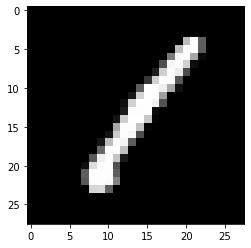

1


In [41]:
# For image at 0

drawImage(x_train[0])
print(y_train[0])

In [42]:
# Apply KNN algorithm

In [43]:

def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(x,y,querypoint,k=5):
    
    # 1. Pick K nearest neighber
    
    vals = []
    
    # for every point in x
    
    for i in range(x.shape[0]):
        
        # compute distance
        d = distance(querypoint,x[i])
        vals.append((d,y[i]))
        
#     print(vals)   
    
    # 2. Sort the vals array & find k nearest points
    vals = sorted(vals)
    
    # Took first k points
    vals = vals[:k]
    
    # 3 . Find Majority Vote
    
    vals = np.array(vals)
    
    new_values = np.unique(vals[: ,1],return_counts=True)

    # index of the max count
    index = new_values[1].argmax()
    
    # map this index to my data
    pred = new_values[0][index]
    
    return pred

In [44]:
# Make prediction over test imgages

In [45]:
pred = knn(x_train,y_train,x_test[1])

In [46]:
pred

7.0

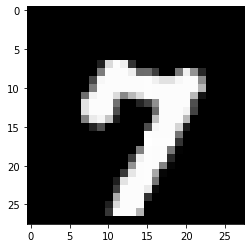

In [47]:
drawImage(x_test[1])

In [48]:
print(y_test[1])

7


In [50]:
pred = knn(x_train,y_train,x_test[4])

In [51]:
pred

2.0

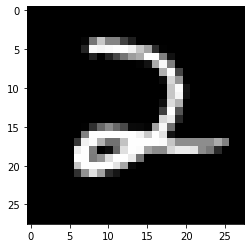

In [52]:
drawImage(x_test[4])

In [53]:
print(y_test[4])

2


4.0


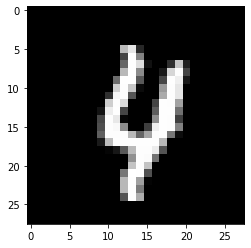

4


In [56]:
pred = knn(x_train,y_train,x_test[47])
print(pred)
drawImage(x_test[47])
print(y_test[47])

7.0


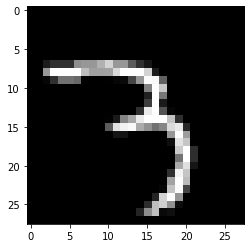

3


In [59]:
pred = knn(x_train,y_train,x_test[27])
print(pred)
drawImage(x_test[27])
print(y_test[27])

3.0


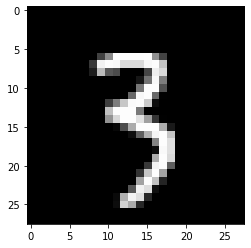

3


In [60]:
pred = knn(x_train,y_train,x_test[17])
print(pred)
drawImage(x_test[17])
print(y_test[17])

7.0


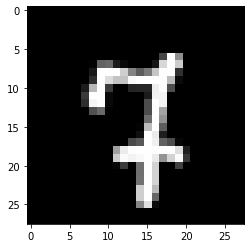

7


In [62]:
pred = knn(x_train,y_train,x_test[99])
print(pred)
drawImage(x_test[99])
print(y_test[99])

In [57]:
# Task to do ??

In [ ]:
'''
 - We have to compute the accuracy of this project
 
 - we have x text values
 - we have y test values
 
 - we have to make prediction over xtest and then compare
'''